<a href="https://colab.research.google.com/github/YaPineiro/python-training/blob/main/Credit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Risk Assessment: High Risk - Poor Creditworthiness


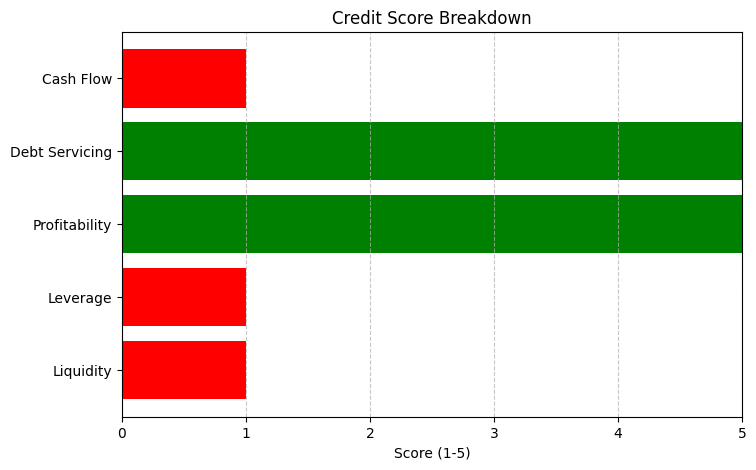

Report saved to credit_analysis.xlsx


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

class CreditAnalysis:
    def __init__(self, financials):
        """
        financials: dictionary containing key financial values.
        Expected keys:
        'current_assets', 'current_liabilities', 'inventory', 'total_debt', 'total_equity',
        'ebit', 'interest_expense', 'net_income', 'total_assets', 'operating_cash_flow'
        """
        self.financials = financials
        self.scores = {}

    def calculate_ratios(self):
        """Calculate key financial ratios."""
        f = self.financials
        self.ratios = {
            "Current Ratio": f["current_assets"] / f["current_liabilities"],
            "Quick Ratio": (f["current_assets"] - f["inventory"]) / f["current_liabilities"],
            "Debt-to-Equity Ratio": f["total_debt"] / f["total_equity"],
            "Interest Coverage Ratio": f["ebit"] / f["interest_expense"],
            "Net Profit Margin": f["net_income"] / f["ebit"],
            "Return on Assets (ROA)": f["net_income"] / f["total_assets"],
            "Operating Cash Flow to Debt": f["operating_cash_flow"] / f["total_debt"]
        }
        return self.ratios

    def score_credit(self):
        """Assign scores based on thresholds."""
        self.scores = {
            "Liquidity": 5 if self.ratios["Current Ratio"] > 2 else (3 if self.ratios["Current Ratio"] > 1 else 1),
            "Leverage": 5 if self.ratios["Debt-to-Equity Ratio"] < 1 else (3 if self.ratios["Debt-to-Equity Ratio"] < 2 else 1),
            "Profitability": 5 if self.ratios["Net Profit Margin"] > 0.15 else (3 if self.ratios["Net Profit Margin"] > 0.05 else 1),
            "Debt Servicing": 5 if self.ratios["Interest Coverage Ratio"] > 3 else (3 if self.ratios["Interest Coverage Ratio"] > 1.5 else 1),
            "Cash Flow": 5 if self.ratios["Operating Cash Flow to Debt"] > 0.2 else (3 if self.ratios["Operating Cash Flow to Debt"] > 0.1 else 1)
        }
        self.scores["Total Score"] = sum(self.scores.values())
        return self.scores

    def risk_assessment(self):
        """Assess the creditworthiness."""
        score = self.scores["Total Score"]
        if score >= 20:
            return "Low Risk - Good Creditworthiness"
        elif score >= 15:
            return "Moderate Risk - Acceptable Creditworthiness"
        else:
            return "High Risk - Poor Creditworthiness"

    def visualize_scores(self):
        """Generate a bar chart for credit scores."""
        categories = list(self.scores.keys())[:-1]  # Exclude 'Total Score'
        scores = [self.scores[cat] for cat in categories]

        plt.figure(figsize=(8, 5))
        plt.barh(categories, scores, color=["green" if s == 5 else "orange" if s == 3 else "red" for s in scores])
        plt.xlabel("Score (1-5)")
        plt.title("Credit Score Breakdown")
        plt.xlim(0, 5)
        plt.grid(axis="x", linestyle="--", alpha=0.7)
        plt.show()

    def export_to_excel(self, filename="credit_analysis.xlsx"):
        """Export ratios, scores, and assessment to an Excel file."""
        data = {
            "Metric": list(self.ratios.keys()) + list(self.scores.keys()) + ["Risk Assessment"],
            "Value": list(self.ratios.values()) + list(self.scores.values()) + [self.risk_assessment()]
        }
        df = pd.DataFrame(data)
        df.to_excel(filename, index=False)
        print(f"Report saved to {filename}")

# Example Usage
financial_data = {
    "current_assets": 500000,
    "current_liabilities": 1000000,
    "inventory": 180000,
    "total_debt": 140000,
    "total_equity": 60000,
    "ebit": 15000,
    "interest_expense": 3000,
    "net_income": 12000,
    "total_assets": 100000,
    "operating_cash_flow": 12000
}

credit_model = CreditAnalysis(financial_data)
credit_model.calculate_ratios()
credit_model.score_credit()
assessment = credit_model.risk_assessment()

print("Risk Assessment:", assessment)
credit_model.visualize_scores()
credit_model.export_to_excel()
